<a href="https://colab.research.google.com/github/ThanhLuan2002/AI/blob/main/baikt_tuan11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# bai 1 2 bac tu do

import os# thư viện tạo địa chỉ
from PIL import Image# thư viện đọc hình ảnh
import numpy as np
import math as m
from keras import models
import pandas as pd
import csv
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

In [ ]:
create_data=[]
for i in range(0,180,2):
  arr=[]  # tạo list để chứa du lieu 
  for j in range(0,180,2):
    x=50*m.cos(m.radians(i))+40*m.cos(m.radians(i+j))
    y=50*m.sin(m.radians(i))+40*m.sin(m.radians(i+j))
    arr.append(np.array((i,j,x,y))) # thêm du lieu vào list
  create_data.extend(arr) 

In [ ]:
header = ['anpha', 'theta', 'x', 'y']
#tao file robot_2bac.csv 
with open('robot_2bac.csv', 'w', encoding='UTF8', newline='') as data_table:
    writer = csv.writer(data_table)
    #tao lable cho tu cot
    writer.writerow(header)
    #doc du lieu tu mang create_data
    writer.writerows(create_data)

In [ ]:
#doc file robot_2bac.csv
data=pd.read_csv('robot_2bac.csv')
#tao feature
x=np.array(data.drop(['anpha','theta'],axis=1))
#tao target
y=np.array(data[['anpha','theta']])

In [ ]:
# chia du lieu thanh 2 tap test va train
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
x_train.shape

(6480, 2)

In [ ]:
#tao model de huan luyen
model=Sequential()
model.add(Dense(256, activation='relu', input_shape = (2,))) 
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(2,  activation='linear'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               768       
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 2)                 66        
                                                                 
Total params: 44,066
Trainable params: 44,066
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#compile model
model.compile(loss='mse',optimizer=Adam(),metrics=['mean_absolute_error'])
#day hoc model
history=model.fit(x_train,y_train,batch_size=200,epochs=1000,verbose=1, validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',patience=70)]) #epochs số lần học

Epoch 1/1000
26/26 [==============================] - 3s 10ms/step - loss: 6621.9390 - mean_absolute_error: 65.2691 - val_loss: 4654.0249 - val_mean_absolute_error: 54.0622
Epoch 2/1000
26/26 [==============================] - 0s 4ms/step - loss: 3942.0610 - mean_absolute_error: 45.5566 - val_loss: 4135.3301 - val_mean_absolute_error: 46.1172
Epoch 3/1000
26/26 [==============================] - 0s 4ms/step - loss: 3749.5896 - mean_absolute_error: 43.1739 - val_loss: 4062.2136 - val_mean_absolute_error: 44.9428
Epoch 4/1000
26/26 [==============================] - 0s 4ms/step - loss: 3685.2300 - mean_absolute_error: 42.7311 - val_loss: 4026.2520 - val_mean_absolute_error: 44.5419
Epoch 5/1000
26/26 [==============================] - 0s 5ms/step - loss: 3647.3442 - mean_absolute_error: 42.3940 - val_loss: 3991.2642 - val_mean_absolute_error: 44.4146
Epoch 6/1000
26/26 [==============================] - 0s 5ms/step - loss: 3608.8716 - mean_absolute_error: 42.2406 - val_loss: 3954.1304 - 

In [ ]:
score=model.evaluate(x_test,y_test,verbose=0)

print('Test loss:',score[0])
print('Test mean absolute error:',score[1])

Test loss: 3.8611204624176025
Test mean absolute error: 1.1337958574295044


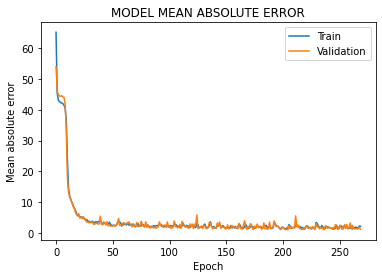

In [ ]:
# ve bieu do hien thi
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('MODEL MEAN ABSOLUTE ERROR')
plt.ylabel('Mean absolute error')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'])
plt.show()

In [ ]:
y_pred=model.predict(x_test)
#so sanh ket qua
print("gia tri tien doan: ",y_pred[5])
print("gia tri thuc: ",y_test[5])

gia tri tien doan:  [138.0643  130.93846]
gia tri thuc:  [138. 130.]


In [ ]:
######################
# bai 2 robot 3 bac tu do

# thư viện tạo địa chỉ
import os
# thư viện đọc hình ảnh
from PIL import Image
import numpy as np
import math as m
from keras import models
import pandas as pd
import csv
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

In [ ]:
tao_dulieu=[]
for i in range(0,180,2):
  arr=[]  # 
  for j in range(0,180,2):
    k=180-i-j
    x=50*m.cos(m.radians(i))+40*m.cos(m.radians(i+j))+30*m.cos(m.radians(i+j+k))
    y=50*m.sin(m.radians(i))+40*m.sin(m.radians(i+j))+30*m.sin(m.radians(i+j+k))
    arr.append(np.array((i,j,k,x,y))) # 
  tao_dulieu.extend(arr) # 

In [ ]:
header = ['anpha', 'beta','theta', 'x', 'y']
with open('robot_3bac.csv', 'w', encoding='UTF8', newline='') as data_table:
    writer = csv.writer(data_table)
    # write the header
    writer.writerow(header)
    # write multiple rows
    writer.writerows(tao_dulieu)

In [ ]:
data=pd.read_csv('robot_3bac.csv')
x=np.array(data.drop(['anpha','beta','theta'],axis=1))
y=np.array(data[['anpha','beta','theta']])

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
x_train.shape

(6480, 2)

In [ ]:
model=Sequential()
model.add(Dense(128, activation='relu', input_shape = (2,))) 
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
#model.add(Dropout(0.1))
model.add(Dense(3,  activation='linear')) #####
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 128)               384       
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 16)                528       
                                                                 
 dense_9 (Dense)             (None, 3)                 51        
                                                                 
Total params: 11,299
Trainable params: 11,299
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='mse',optimizer=Adam(),metrics=['mean_absolute_error'])
history=model.fit(x_train,y_train,batch_size=200,epochs=500,verbose=1, validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',patience=70)]) 

Epoch 1/500
26/26 [==============================] - 1s 10ms/step - loss: 5713.7158 - mean_absolute_error: 60.0262 - val_loss: 3268.6404 - val_mean_absolute_error: 44.7641
Epoch 2/500
26/26 [==============================] - 0s 4ms/step - loss: 2944.8577 - mean_absolute_error: 39.4335 - val_loss: 2423.6982 - val_mean_absolute_error: 34.6339
Epoch 3/500
26/26 [==============================] - 0s 4ms/step - loss: 2526.4871 - mean_absolute_error: 35.0436 - val_loss: 2289.7808 - val_mean_absolute_error: 33.3114
Epoch 4/500
26/26 [==============================] - 0s 4ms/step - loss: 2435.1687 - mean_absolute_error: 33.8400 - val_loss: 2230.0439 - val_mean_absolute_error: 32.0437
Epoch 5/500
26/26 [==============================] - 0s 4ms/step - loss: 2405.3250 - mean_absolute_error: 33.4691 - val_loss: 2224.4856 - val_mean_absolute_error: 32.3576
Epoch 6/500
26/26 [==============================] - 0s 5ms/step - loss: 2393.1799 - mean_absolute_error: 33.3747 - val_loss: 2203.3818 - val_me

In [ ]:
score=model.evaluate(x_test,y_test,verbose=0)
print('Test loss:',score[0])
print('Test mean absolute error:',score[1])

Test loss: 15.25188159942627
Test mean absolute error: 2.7080142498016357


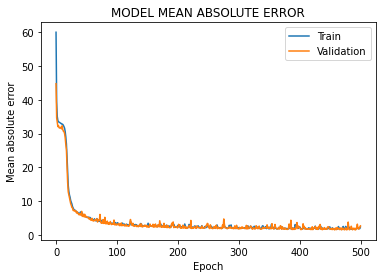

In [ ]:
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('MODEL MEAN ABSOLUTE ERROR')
plt.ylabel('Mean absolute error')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'])
plt.show()


In [ ]:
y_pred=model.predict(x_test)
print("gia tri tien doan: ",y_pred[5])
print("gia tri thuc: ",y_test[5])

gia tri tien doan:  [26.106062 83.110085 71.071304]
gia tri thuc:  [26. 84. 70.]


In [ ]:
#@title Default title text
#################### 
# bai 3 nhan dien khuon mat ca nhan

import os
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import cv2
from cv2 import resize


gia tri tien doan:  [ 34.60936  108.91371   38.833973]
gia tri thuc:  [ 32. 108.  40.]


In [ ]:
# ket noi vs drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_path = '/content/drive/MyDrive/AI/train'
image_list = []



for file_name in os.listdir(data_path):
  img = cv2.imread(os.path.join(data_path, file_name))
  image_list.append(cv2.resize(img, (150, 150), interpolation = cv2.INTER_AREA))

In [ ]:
image_list = np.array(image_list)
print('[*] Length: ', len(image_list))
print('[*] Shape: ', image_list.shape)

[*] Length:  50
[*] Shape:  (50, 150, 150, 3)


In [ ]:
y = []

for i in range(len(image_list)):
  if i <= 33:
    y.append(1)
  else: 
    y.append(0)

In [ ]:
y = np.array(y)
print(y.shape)

(50,)


In [ ]:
X_train = []
X_test = []
for img in image_list[:28]:
  X_train.append(img)

for img in image_list[28:]:
  X_test.append(img)

X_train = np.array(X_train)
X_test = np.array(X_test)
print(X_train.shape)
print(X_test.shape)

(28, 150, 150, 3)
(22, 150, 150, 3)


In [ ]:
y_train = []
y_test = []
for img in y[:28]:
  y_train.append(img)


for img in y[28:]:
  y_test.append(img)

y_train = np.array(y_train)
y_test = np.array(y_test)
print(y_train.shape)
print(y_test.shape)

(28,)
(22,)


In [ ]:
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)
X_test, y_test = shuffle(X_test, y_test)

In [ ]:
from skimage import color

X_train = color.rgb2gray(X_train)
print(X_train.shape)
X_test = color.rgb2gray(X_test)
print(X_test.shape)
X = X_test

(28, 150, 150)
(22, 150, 150)


<function matplotlib.pyplot.show>

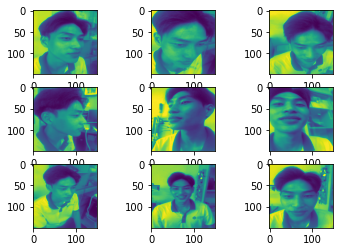

In [ ]:
for i in range(9):
  plt.subplot(330 + i + 1)
  plt.imshow(X_train[i])
plt.show

In [ ]:
X_train = X_train.reshape(28, 22500)
X_test = X_test.reshape(22, 22500)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [ ]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, 2)
y_test = to_categorical(y_test, 2)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(28, 22500)
(22, 22500)
(28, 2)
(22, 2)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

model = Sequential()
model.add(Dense(512, activation = 'relu',input_shape=(22500,)))
model.add(Dropout(0.2))
model.add(Dense(1024, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(2, activation = 'softmax'))
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_63 (Dense)            (None, 512)               11520512  
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_64 (Dense)            (None, 1024)              525312    
                                                                 
 dropout_1 (Dropout)         (None, 1024)              0         
                                                                 
 dense_65 (Dense)            (None, 512)               524800    
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_66 (Dense)            (None, 2)               

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss = 'categorical_crossentropy', optimizer = 'RMSprop', metrics = ['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, batch_size = 64, epochs = 150, verbose = 1, validation_data = (X_test, y_test))

In [ ]:
score = model.evaluate(X_test, y_test, verbose = 1)

1/1 [==============================] - 0s 32ms/step - loss: 726.1826 - accuracy: 0.2727


In [ ]:
model.save('myself_1.h5')

In [ ]:
##########################################3


# Khai báo và sử dụng các thư viện sau
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array


In [ ]:
# Chuyển đến file Google Drive chứa bộ ảnh đã tạo
%cd"/content/drive/MyDrive/AI/train"

/content/drive/MyDrive/AI/train


In [ ]:
# Tạo ra class ImageDataGenerator để chỉnh sửa ảnh 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [ ]:
# Tạo bộ dữ liệu training set
training_set=train_datagen.flow_from_directory('/content/drive/MyDrive/AI/train',target_size=(32,32), batch_size=32, class_mode='categorical')

Found 0 images belonging to 0 classes.


In [ ]:
#############################
# thư viện tạo địa chỉ
import os
# thư viện đọc hình ảnh
from PIL import Image
# thư viện để chuyển hình thành array
import numpy as np


from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from tensorflow.keras.optimizers import RMSprop

import matplotlib.pyplot as plt

In [ ]:
# tạo catagory
dick={'Luan':[1,0],'Cho':[0,1]}
# ket noi vs drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# tạo địa chỉ dẫn tới hình ảnh và gán hình ảnh vào biến
def getData(dirData, x):
  for i in os.listdir(dirData):
    i_path=os.path.join(dirData,i) # tạo địa chỉ chỉ tới thư mục
    lst=[]  # tạo list để chứa hình ảnh của từng folder
    for j in os.listdir(i_path):
      j_path=os.path.join(i_path,j) # tạo địa chỉ chỉ tới thư mục
      label=j_path.split('/')[6]
      img=np.array(Image.open(j_path)) # mở hình ảnh, np.array để chuyển thành ma trận giống trong thư viện cifar
      lst.append((img,dick[label])) # thêm hình ảnh vào list
    x.extend(lst) # tách hình ảnh vì append chỉ thêm hình không quan tâm dấu phẩy nên thành 1 khối khối
  return x

In [ ]:
train='/content/drive/MyDrive/AI/train_ann'
test='/content/drive/MyDrive/AI/test_ann'
x_train=[]
x_test=[]
y_train=[]
y_test=[]
x_train=getData(train,x_train)
x_test=getData(test,x_test)
for i in range (0,3):
  np.random.shuffle(x_train)
print(len(x_train))
print(len(x_test))

61
13


In [ ]:
x_train_1=np.array([x[0] for _, x in enumerate(x_train)])
y_train=np.array([x[1] for _, x in enumerate(x_train)])
x_test_1=np.array([x[0] for _, x in enumerate(x_test)])
y_test=np.array([x[1] for _, x in enumerate(x_test)])
x_pred=x_test_1
y_pred=y_test
x_train_1=x_train_1.astype('float32')
x_test_1=x_test_1.astype('float32')
x_train_1=x_train_1.reshape(61,67500)
x_test_1=x_test_1.reshape(13,67500)
x_train_1/=255
x_test_1/=255

In [ ]:
model=Sequential()
model.add(Dense(512,activation='relu',input_shape=(67500,)))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(2,activation='softmax'))
model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_64 (Dense)            (None, 512)               34560512  
                                                                 
 dense_65 (Dense)            (None, 512)               262656    
                                                                 
 dropout_28 (Dropout)        (None, 512)               0         
                                                                 
 dense_66 (Dense)            (None, 2)                 1026      
                                                                 
Total params: 34,824,194
Trainable params: 34,824,194
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])
history=model.fit(x_train_1,y_train,
                  batch_size=64,epochs=500,verbose=1) #epochs số lần học

Epoch 1/500
1/1 [==============================] - 1s 807ms/step - loss: 0.1959 - accuracy: 0.9344
Epoch 2/500
1/1 [==============================] - 0s 32ms/step - loss: 14.3827 - accuracy: 0.5574
Epoch 3/500
1/1 [==============================] - 0s 32ms/step - loss: 0.2055 - accuracy: 0.9344
Epoch 4/500
1/1 [==============================] - 0s 30ms/step - loss: 0.1988 - accuracy: 0.9344
Epoch 5/500
1/1 [==============================] - 0s 33ms/step - loss: 0.1990 - accuracy: 0.9344
Epoch 6/500
1/1 [==============================] - 0s 32ms/step - loss: 0.2059 - accuracy: 0.9344
Epoch 7/500
1/1 [==============================] - 0s 39ms/step - loss: 0.2051 - accuracy: 0.9344
Epoch 8/500
1/1 [==============================] - 0s 35ms/step - loss: 0.2033 - accuracy: 0.9344
Epoch 9/500
1/1 [==============================] - 0s 31ms/step - loss: 0.2022 - accuracy: 0.9344
Epoch 10/500
1/1 [==============================] - 0s 39ms/step - loss: 0.2004 - accuracy: 0.9344
Epoch 11/500
1/1 

In [ ]:
Score=model.evaluate(x_test_1,y_test,verbose=0)
print('Test loss',Score[0])
print('Test accuary', Score[1])

Test loss 0.41768524050712585
Test accuary 0.8461538553237915


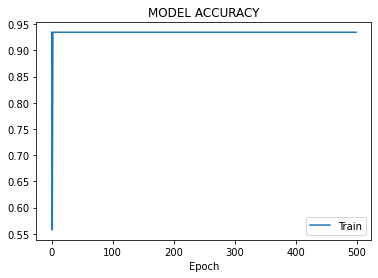

In [ ]:


# Vẽ đồ thị giữa số lần học (Epochs) và độ chính xác (Accuracy)
plt.plot(history.history['accuracy'])
plt.title('MODEL ACCURACY')
plt.xlabel('Epoch')
plt.legend(['Train'])
plt.show()

In [ ]:
hinh=['Luan','Cho']

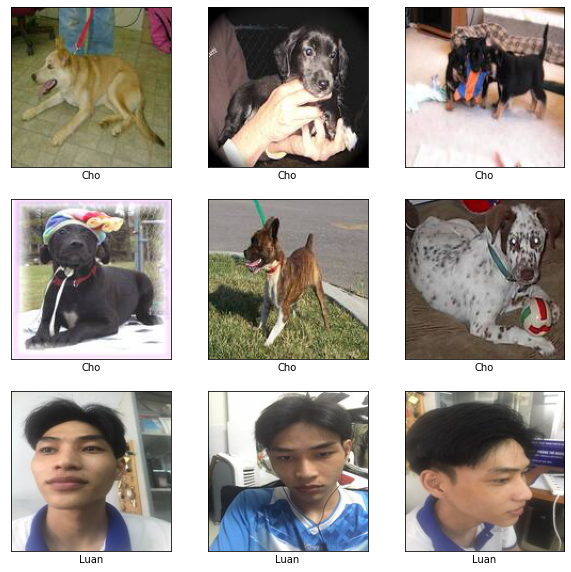

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(330+i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_pred[i], cmap='binary')
    plt.xlabel(hinh[np.argmax(y_pred[i])])
plt.show()

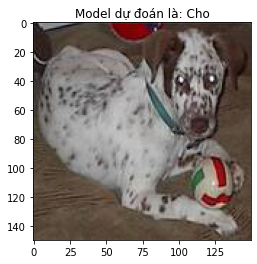

In [ ]:
plt.title("Model dự đoán là: " + str(hinh[np.argmax(model.predict(x_pred[5].reshape((-1,67500))))]))
plt.imshow(x_pred[5])

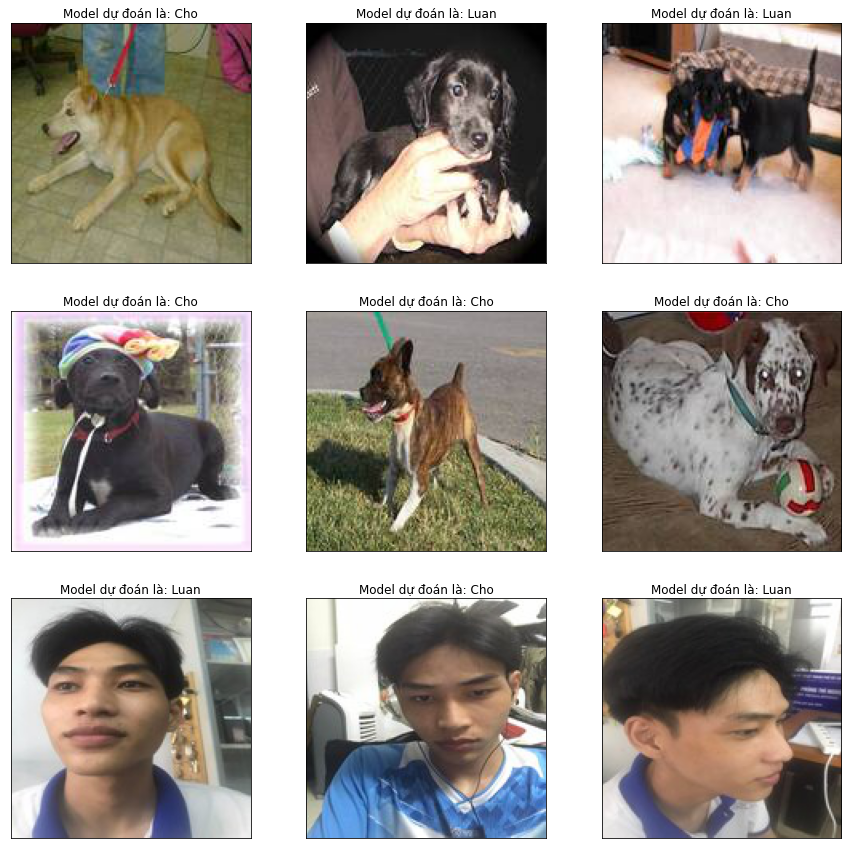

In [ ]:
plt.figure(figsize=(15, 15))
for i in range(9):
    plt.subplot(330+ i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_pred[i], cmap='binary')
    plt.title("Model dự đoán là: " + str(hinh[np.argmax(model.predict(x_pred[i].reshape((-1,67500))))]))
plt.show()

In [ ]:
######################
#bai 4 cnn

#Khai báo các thư viện
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop, Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing

In [ ]:
train_data=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
training_set=train_data.flow_from_directory('/content/drive/MyDrive/AI/train',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 156 images belonging to 3 classes.


In [ ]:
validation=train_data.flow_from_directory('/content/drive/MyDrive/AI/test',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 15 images belonging to 3 classes.


In [ ]:
training_set.class_indices

{'Duy': 0, 'Luan': 1, 'Phat': 2}

In [ ]:
model=Sequential()
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) # Tích chập 32 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) # Tích chập 64 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,1500,3))) # Tích chập 128 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(3,activation='softmax'))
model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                 

In [ ]:
opt=SGD(lr=0.01,momentum=0.9)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
model.compile(optimizer=Adam(),loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(training_set,epochs=150,batch_size=10,verbose=1, validation_data=validation, callbacks=[EarlyStopping(monitor='val_loss', patience=20)]) # verbose=1 để hiển thị quá trinh học

Epoch 1/150
5/5 [==============================] - 42s 6s/step - loss: 12.7801 - accuracy: 0.3526 - val_loss: 1.2018 - val_accuracy: 0.3333
Epoch 2/150
5/5 [==============================] - 1s 252ms/step - loss: 1.0537 - accuracy: 0.5256 - val_loss: 0.8861 - val_accuracy: 0.6000
Epoch 3/150
5/5 [==============================] - 1s 253ms/step - loss: 0.7414 - accuracy: 0.7179 - val_loss: 0.4828 - val_accuracy: 0.9333
Epoch 4/150
5/5 [==============================] - 1s 265ms/step - loss: 0.4476 - accuracy: 0.7756 - val_loss: 0.1628 - val_accuracy: 0.9333
Epoch 5/150
5/5 [==============================] - 1s 258ms/step - loss: 0.2144 - accuracy: 0.9295 - val_loss: 0.0946 - val_accuracy: 1.0000
Epoch 6/150
5/5 [==============================] - 1s 256ms/step - loss: 0.2301 - accuracy: 0.8846 - val_loss: 0.0859 - val_accuracy: 1.0000
Epoch 7/150
5/5 [==============================] - 1s 264ms/step - loss: 0.2197 - accuracy: 0.9038 - val_loss: 0.2751 - val_accuracy: 0.8667
Epoch 8/150
5/

In [ ]:
# Đánh giá độ chính xác của mô hình sau khi đã train 
Score=model.evaluate(training_set,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.00021957933495286852
Train Accuracy 1.0


<function matplotlib.pyplot.show>

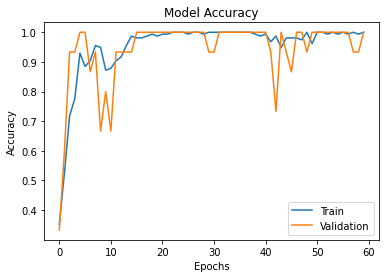

In [ ]:
# Vẽ đồ thị giữa số lần học (Epochs) và độ chính xác (Accuracy)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'])
plt.show

In [ ]:
# Lưu lại
model.save("Save.h5")
model_CNN=load_model('Save.h5')

Phat


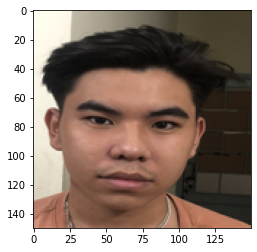

In [ ]:
img=load_img('Untitled8.png',target_size=(150,150)) ##
plt.imshow(img)
import numpy as np
img=img_to_array(img)
#img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_CNN.predict(img)
if round(result[0][0])==1:
  prediction='Duy'
elif round(result[0][1])==1:
  prediction='Luan'
elif round(result[0][2])==1:
  prediction='Phat'
  
print(prediction)